<a href="https://colab.research.google.com/github/MontMendez/EstadisticaVerano/blob/main/5problemas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXAMEN UNIDAD 5

Juárez Méndez Corina Montserrat

# 14.1

Se realizó un experimento para estudiar los efectos de la temperatura y el tipo de horno sobre la vida
de un componente en particular. En el experimento se
utilizaron 4 tipos de horno y 3 niveles de temperatura.
Se asignaron 24 piezas al azar, 2 para cada combinación de tratamientos y se registraron los siguientes resultados.

| Horno | Temperatura (°F) | O1  | O2  | O3  | O4  |
|-------|------------------|-----|-----|-----|-----|
|       | 500              | 227 | 214 | 225 | 260 |
|       |                  | 221 | 259 | 236 | 229 |
|       | 550              | 187 | 181 | 232 | 246 |
|       |                  | 208 | 179 | 198 | 273 |
|       | 600              | 174 | 198 | 178 | 206 |
|       |                  | 202 | 194 | 213 | 219 |

A un nivel de significancia de 0.05 pruebe las hipótesis
de que

  a) las diferentes temperaturas no tienen efecto en la vida del componente
    
  b) los diferentes hornos no tienen efecto en la vida del componente
  
  c) no hay interacción entre el tipo de horno y la temperatura.

In [472]:
import pandas as pd
from io import StringIO
data = '''
temperatura,horno,efecto
500,O1,227
500,O1,221
500,O2,214
500,O2,259
500,O3,225
500,O3,236
500,O4,260
500,O4,229
550,O1,187
550,O1,208
550,O2,181
550,O2,179
550,O3,232
550,O3,198
550,O4,246
550,O4,273
600,O1,174
600,O1,202
600,O2,198
600,O2,194
600,O3,178
600,O3,213
600,O4,206
600,O4,219
'''
df = pd.read_csv(StringIO(data))
df

,temperatura,horno,efecto
0,500,O1,227
1,500,O1,221
2,500,O2,214
3,500,O2,259
4,500,O3,225
5,500,O3,236
6,500,O4,260
7,500,O4,229
8,550,O1,187
9,550,O1,208


In [473]:
#Utilizaré Diseño factorial 2k para saber la interacción entre mis factores
#temperatura y tipo de horno

In [474]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'efecto ~ C(temperatura) * C(horno)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova

#Ho: No hay relación entre variables no hay diferencia significativa.
#Hi: Hay relación entre variables, hay diferencia significativa.
#Alpha: 0.05

,sum_sq,df,F,PR(>F)
C(temperatura),5194.083333,2.0,8.129516,0.005863
C(horno),4963.125000,3.0,5.178688,0.015885
C(temperatura):C(horno),3126.250000,6.0,1.631016,0.221520
Residual,3833.500000,12.0,NaN,NaN


Se rechaza ho para temperatura, por lo tanto los niveles de temperaturas si tienen efecto en la vida del componente.

Se rechaza ho para horno, por lo tanto los tipos de horno si tienen efecto en la vida del componente.

No se rechaza ho en la interacción por lo tanto el tipo de horno y la temperatura no interactuan entre si, para que tengan un efecto en la vida del componente se debe incrementar una u otra pero no las 2 a la vez.

In [475]:
#Utilizaré Diseño en bloques completamente al azar y alternaré mis factores
#temperatura y tipo de horno

In [476]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'efecto ~ C(temperatura) + C(horno)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova

#Ho: No hay relación entre variables no hay diferencia significativa.
#Hi: Hay relación entre variables, hay diferencia significativa.
#Alpha: 0.05

,sum_sq,df,F,PR(>F)
C(temperatura),5194.083333,2.0,6.716728,0.006621
C(horno),4963.125000,3.0,4.278710,0.019076
Residual,6959.750000,18.0,NaN,NaN


Se rechaza ho para temperatura y para horno, por lo tanto ambos tienen efecto en la vida del componente.

valor-p (Shapiro) = 0.5633589117117566


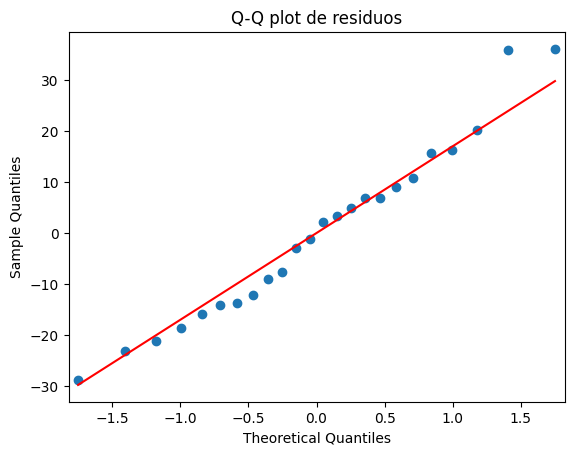

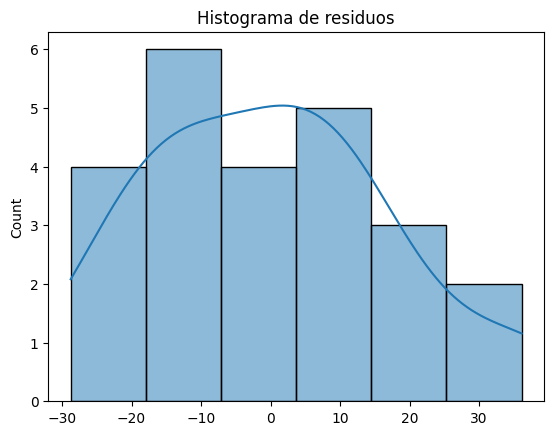

In [477]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns
residuos = modelo_lineal.resid
# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")
# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()
# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

#Ho. hay normalidad
#Hi. no hay normalidad
#Alpha. 0.05

No se rechaza ho, hay normalidad.

### Temperatura

In [478]:
from scipy.stats import levene
grupo1 = df[df['temperatura'] == 500]['efecto']
grupo2 = df[df['temperatura'] == 550]['efecto']
grupo3 = df[df['temperatura'] == 600]['efecto']
stat, p = levene(grupo1, grupo2, grupo3)
print(f"p-valor de Levene: {p}")

#Ho. homoscedasticidad
#Hi. heteroscedasticidad
#Alpha. 0.05

p-valor de Levene: 0.11268337626251641


No se rechaza ho, hay homoscedasticidad.

 Multiple Comparison of Means - Tukey HSD, FWER=0.50  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
   500    550  -20.875   0.21 -34.4759  -7.2741   True
   500    600  -35.875 0.0175 -49.4759 -22.2741   True
   550    600    -15.0 0.4331 -28.6009  -1.3991   True
------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

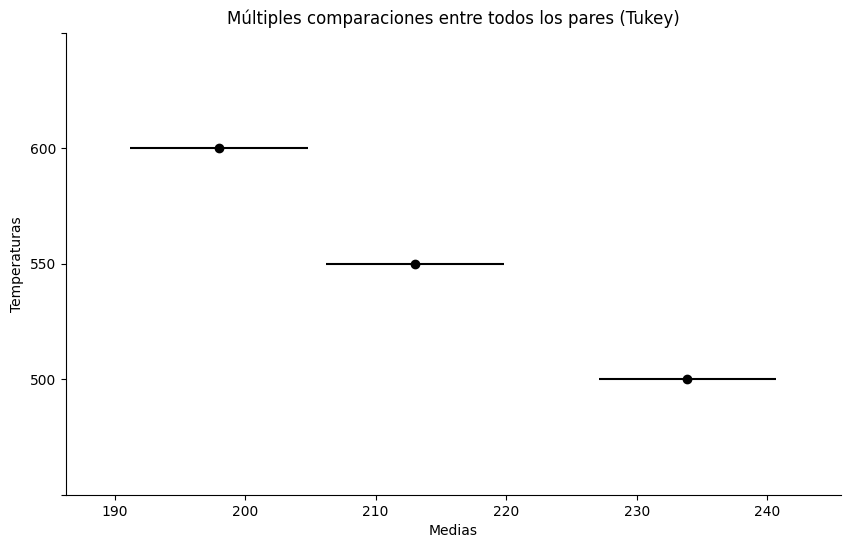

In [479]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
nivel_de_significancia = 0.50
# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['efecto'], groups=df['temperatura'], alpha=nivel_de_significancia)
# Mostrar los resultados
print(tukey)
# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Temperaturas", xlabel="Medias")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

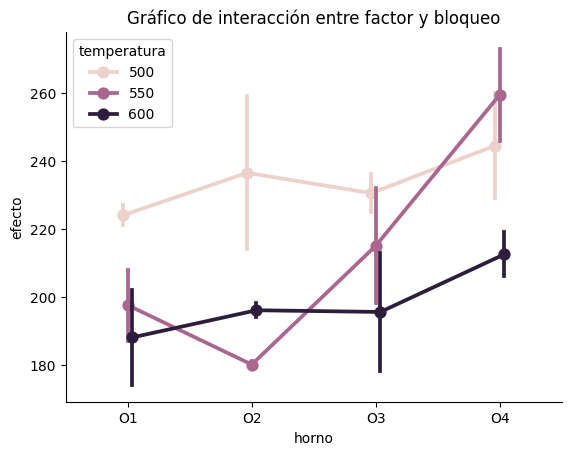

In [480]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de interacción
sns.pointplot(x="horno", y="efecto", hue="temperatura", data=df, dodge=True)
plt.title(f"Gráfico de interacción entre factor y bloqueo")
plt.xlabel("horno")
plt.ylabel("efecto")
plt.legend(title="temperatura")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()

In [481]:
df.groupby(["temperatura"])["efecto"].mean()

,efecto
temperatura,
500,233.875
550,213.000
600,198.000


In [482]:
modelo_lineal.params

,0
Intercept,222.083333
C(temperatura)[T.550],-20.875000
C(temperatura)[T.600],-35.875000
C(horno)[T.O2],1.000000
C(horno)[T.O3],10.500000
C(horno)[T.O4],35.666667


### Horno

In [483]:
from scipy.stats import levene
grupo1 = df[df['horno'] == "O1"]['efecto']
grupo2 = df[df['horno'] == "O2"]['efecto']
grupo3 = df[df['horno'] == "O3"]['efecto']
grupo4 = df[df['horno'] == "O4"]['efecto']
stat, p = levene(grupo1, grupo2, grupo3, grupo4)
print(f"p-valor de Levene: {p}")

#Ho. homoscedasticidad
#Hi. heteroscedasticidad
#Alpha. 0.05

p-valor de Levene: 0.9324301793630873


No se rechaza ho, hay homoscedasticidad.

Multiple Comparison of Means - Tukey HSD, FWER=0.50 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    O1     O2      1.0 0.9999  -19.26   21.26  False
    O1     O3     10.5 0.8807   -9.76   30.76  False
    O1     O4  35.6667 0.0895 15.4067 55.9267   True
    O2     O3      9.5 0.9081  -10.76   29.76  False
    O2     O4  34.6667 0.1023 14.4067 54.9267   True
    O3     O4  25.1667  0.317  4.9067 45.4267   True
----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

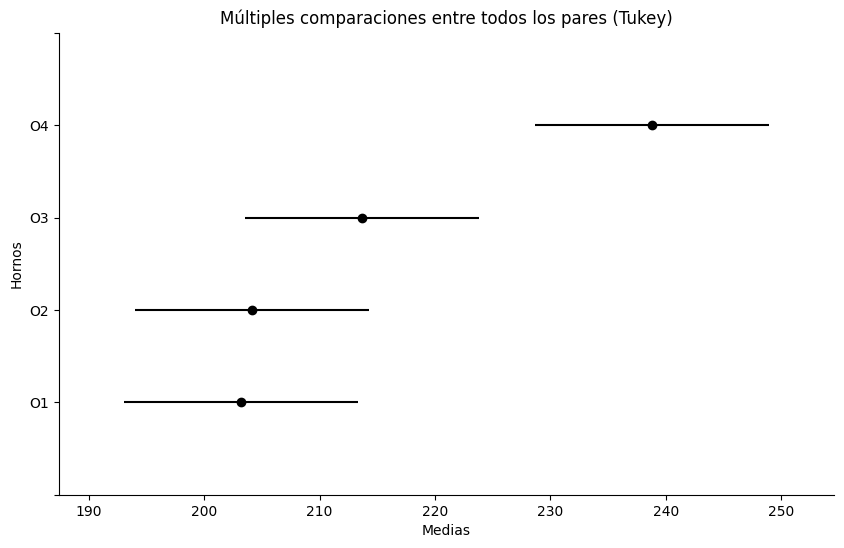

In [484]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
nivel_de_significancia = 0.50
# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['efecto'], groups=df['horno'], alpha=nivel_de_significancia)
# Mostrar los resultados
print(tukey)
# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Hornos", xlabel="Medias")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

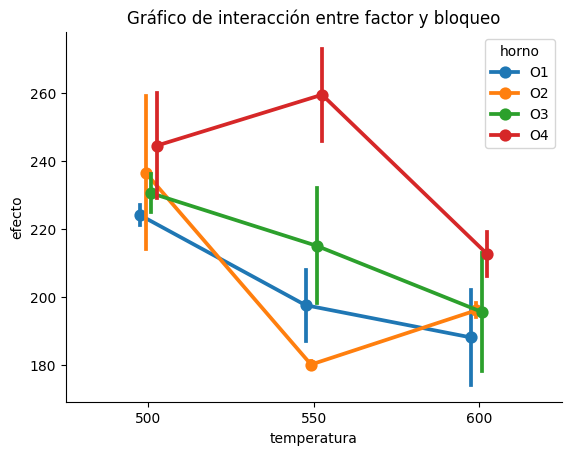

In [485]:
import seaborn as sns
import matplotlib.pyplot as plt
# Crear un gráfico de interacción
sns.pointplot(x="temperatura", y="efecto", hue="horno", data=df, dodge=True)
plt.title(f"Gráfico de interacción entre factor y bloqueo")
plt.xlabel("temperatura")
plt.ylabel("efecto")
plt.legend(title="horno")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()

In [486]:
df.groupby(["horno"])["efecto"].mean()

,efecto
horno,
O1,203.166667
O2,204.166667
O3,213.666667
O4,238.833333


In [487]:
modelo_lineal.params

,0
Intercept,222.083333
C(temperatura)[T.550],-20.875000
C(temperatura)[T.600],-35.875000
C(horno)[T.O2],1.000000
C(horno)[T.O3],10.500000
C(horno)[T.O4],35.666667


En este estudio se observo que la temperatura y el tipo de horno si tienen efectos sobre la vida de un componente en particular, pero por separado. Es decir que  temperatura y horno son variables que no tienen interacción entre sí, por ello es recomendable solo cambiar uno u otro para observar efectos en la vida del componente deseado.

## RESPUESTAS

**A un nivel de significancia de 0.05 pruebe las hipótesis de que**

**a) las diferentes temperaturas no tienen efecto en la vida del componente**
Según anova, rechazamos esta hipótesis, por lo que podemos decir que las temperaturas si tienen efecto en la vida del componente.

**b) los diferentes hornos no tienen efecto en la vida del componente**
Según anova, rechazamos esta hipótesis, por lo que podemos decir que los tipos de hornos si tienen efecto en la vida del componente.

**c) no hay interacción entre el tipo de horno y la temperatura**
Según anova esta hipótesis no se rechaza, ya que la interacción entre la temperatura y los hornos no influyen en el tiempo de vida de un componente en particular.

# 14.6

Se realizó un experimento para determinar si
los aditivos incrementan la adherencia de productos
de caucho. Se elaboraron 16 productos con el aditivo
nuevo y otros 16 sin dicho aditivo. Se registró la siguiente adherencia.

| Temperatura (°C)    | 50  | 60  | 70  | 80  |
|---------------------|-----|-----|-----|-----|
| Sin el aditivo      | 2.3 | 3.4 | 3.8 | 3.9 |
|                     | 2.9 | 3.7 | 3.9 | 3.2 |
|                     | 3.1 | 3.6 | 4.1 | 3.0 |
|                     | 3.2 | 3.2 | 3.8 | 2.7 |
| Con el aditivo      | 4.3 | 3.8 | 3.9 | 3.5 |
|                     | 3.9 | 3.8 | 4.0 | 3.6 |
|                     | 3.9 | 3.9 | 3.7 | 3.8 |
|                     | 4.2 | 3.5 | 3.6 | 3.9 |


Haga un análisis de varianza para probar la existencia
de efectos principales y de interacción significativos.

In [488]:
import pandas as pd
from io import StringIO
data = '''
temperatura,adictivo,adherencia
50,sin,2.3
50,sin,2.9
50,sin,3.1
50,sin,3.2
50,con,4.3
50,con,3.9
50,con,3.9
50,con,4.2
60,sin,3.4
60,sin,3.7
60,sin,3.6
60,sin,3.2
60,con,3.8
60,con,3.8
60,con,3.9
60,con,3.5
70,sin,3.8
70,sin,3.9
70,sin,4.1
70,sin,3.8
70,con,3.9
70,con,4.0
70,con,3.7
70,con,3.6
80,sin,3.9
80,sin,3.2
80,sin,3.0
80,sin,2.7
80,con,3.5
80,con,3.6
80,con,3.8
80,con,3.9
'''

df = pd.read_csv(StringIO(data))
df

,temperatura,adictivo,adherencia
0,50,sin,2.3
1,50,sin,2.9
2,50,sin,3.1
3,50,sin,3.2
4,50,con,4.3
5,50,con,3.9
6,50,con,3.9
7,50,con,4.2
8,60,sin,3.4
9,60,sin,3.7


In [489]:
#Utilizaré Diseño factorial 2k para comprobar si hay interacción entre variables

In [490]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'adherencia ~ C(adictivo) * C(temperatura)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova

#Ho: No hay relación entre variables no hay diferencia significativa.
#Hi: Hay relación entre variables, hay diferencia significativa.
#Alpha: 0.05

,sum_sq,df,F,PR(>F)
C(adictivo),1.757812,1.0,22.291942,0.000084
C(temperatura),0.805937,3.0,3.406869,0.033805
C(adictivo):C(temperatura),1.793437,3.0,7.581242,0.000980
Residual,1.892500,24.0,NaN,NaN


Se rechaza ho para adictivos, por lo tanto los aditivos incrementan la adherencia de productos de caucho

Se rechaza ho para temperatura, por lo tanto las diferentes temperaturas incrementan la adherencia de productos de caucho

Se rechaza ho para interacción, por lo que los adictivos y las temperaturas en conjunto influyen en la adherencia de cauchos.

valor-p (Shapiro) = 0.29322983132227787


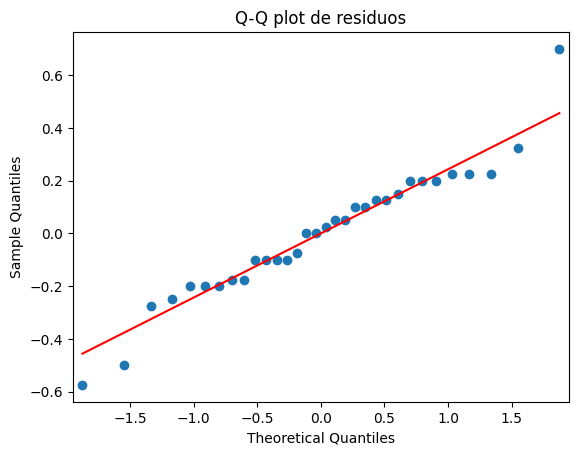

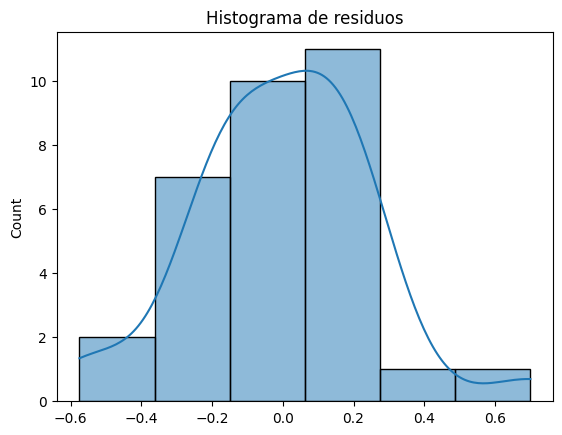

In [491]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns
residuos = modelo_lineal.resid
# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")
# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()
# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

#Ho: Normalidad
#Hi: No normalidad
#Alpha: 0.05

No se rechaza ho, hay normalidad

In [492]:
from scipy.stats import levene
# Obtener residuos del modelo
residuos = modelo_lineal.resid
# Agregar residuos al dataframe original
df['residuos'] = residuos
# Agrupar residuos por combinación de factores
# Supongamos que tus factores son A, B, y C
grupos = df.groupby(['adictivo', 'temperatura'])['residuos'].apply(list)
# Ejecutar prueba de Levene
stat, p = levene(*grupos)
print(f'Estadístico de Levene: {stat:.3f}')
print(f'Valor p: {p:.3f}')

#Ho: homoscedasticidad
#Hi: heteroscedasticidad
#alpha= 0.05

Estadístico de Levene: 0.995
Valor p: 0.458


No se rechaza ho, por lo tanto hay homoscedasticidad

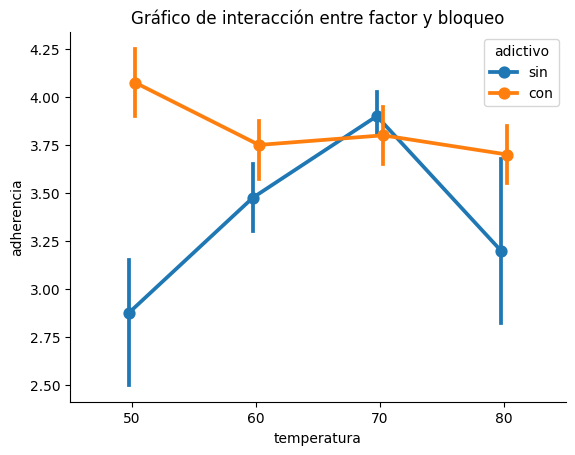

In [493]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de interacción
sns.pointplot(x="temperatura", y="adherencia", hue="adictivo", data=df, dodge=True)
plt.title(f"Gráfico de interacción entre factor y bloqueo")
plt.xlabel("temperatura")
plt.ylabel("adherencia")
plt.legend(title="adictivo")
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.show()

In [494]:
df.groupby(["adictivo"])["adherencia"].mean()

,adherencia
adictivo,
con,3.83125
sin,3.36250


In [495]:
modelo_lineal.params

,0
Intercept,4.075
C(adictivo)[T.sin],-1.200
C(temperatura)[T.60],-0.325
C(temperatura)[T.70],-0.275
C(temperatura)[T.80],-0.375
C(adictivo)[T.sin]:C(temperatura)[T.60],0.925
C(adictivo)[T.sin]:C(temperatura)[T.70],1.300
C(adictivo)[T.sin]:C(temperatura)[T.80],0.700


En este ejercicio pudimos observar que hay dos tratamientos, uno donde se aplican adictivos y otro donde no se aplican para determinar si estos incrementan la adherencia de productos de caucho. Es por ello que se recomienda utilizar adictivos ya que estos si influyen y aumentan la adherencia que tienen los productos. Y más combinandolo con la temperatura.

## RESPUESTAS

**Haga un análisis de varianza para probar la existencia de efectos principales y de interacción significativos.**

Anova nos indica que si existe diferencia significativa entre las temperaturas y entre los adictivos; asi mismo indica que si hay interacción entre estos mismos, dandonos a entender que juntas producen mayor adherencia.

# 14.7

Se sabe que la velocidad de extracción de cierto
polímero depende de la temperatura de reacción y de
la cantidad de catalizador empleada. Se hizo un experimento en 4 niveles de temperatura y 5 niveles de catalizador, y se registró la velocidad de extracción en la
siguiente tabla:

| Temperatura (°C) | 0.5% | 0.6% | 0.7% | 0.8% | 0.9% |
|------------------|------|------|------|------|------|
| 50               | 38   | 45   | 57   | 59   | 57   |
| 50 (replica)      | 41   | 47   | 59   | 61   | 58   |
| 60               | 44   | 56   | 70   | 73   | 61   |
| 60 (replica)      | 43   | 57   | 69   | 72   | 58   |
| 70               | 44   | 56   | 70   | 73   | 61   |
| 70 (replica)      | 47   | 60   | 67   | 61   | 59   |
| 80               | 49   | 62   | 70   | 62   | 53   |
| 80 (replica)      | 47   | 65   | 55   | 69   | 58   |

Realice un análisis de varianza. Pruebe si hay efectos
principales y de interacción significativos.


In [496]:
import pandas as pd
from io import StringIO

data = '''
temperatura,catalizador,velocidad
50,0.5,38
50,0.5,41
50,0.6,45
50,0.6,47
50,0.7,57
50,0.7,59
50,0.8,59
50,0.8,61
50,0.9,57
50,0.9,58
60,0.5,44
60,0.5,43
60,0.6,56
60,0.6,57
60,0.7,70
60,0.7,69
60,0.8,73
60,0.8,72
60,0.9,61
60,0.9,58
70,0.5,44
70,0.5,47
70,0.6,56
70,0.6,60
70,0.7,70
70,0.7,67
70,0.8,73
70,0.8,61
70,0.9,61
70,0.9,59
80,0.5,49
80,0.5,47
80,0.6,62
80,0.6,65
80,0.7,70
80,0.7,55
80,0.8,62
80,0.8,69
80,0.9,53
80,0.9,58
'''

df = pd.read_csv(StringIO(data))
df

,temperatura,catalizador,velocidad
0,50,0.5,38
1,50,0.5,41
2,50,0.6,45
3,50,0.6,47
4,50,0.7,57
5,50,0.7,59
6,50,0.8,59
7,50,0.8,61
8,50,0.9,57
9,50,0.9,58


In [497]:
#Utilizaré Diseño factorial 2k para saber si mis factores temperatura y la
#cantidad de catalizador interactuan entre sí.

In [498]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'velocidad ~ C(temperatura) * C(catalizador)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova

#Ho: No hay relación entre variables no hay diferencia significativa.
#Hi: Hay relación entre variables, hay diferencia significativa.
#Alpha: 0.05

,sum_sq,df,F,PR(>F)
C(temperatura),430.475,3.0,10.850032,1.907447e-04
C(catalizador),2466.650,4.0,46.628544,7.280631e-10
C(temperatura):C(catalizador),326.150,12.0,2.055135,7.445592e-02
Residual,264.500,20.0,NaN,NaN


Se rechaza ho para temperatura, por lo tanto los niveles de temperaturas si tienen efecto en la velocidad de extracción de un polímero.

Se rechaza ho para catalizador, por lo tanto la cantidad de catalizadores si tienen efecto en la velocidad de extracción de cierto polímero.

No se rechaza ho en la interacción, por lo tanto el tipo de catalizador y la temperatura no interactuan entre si, para que tengan un efecto en la velocidad de extracción de cierto polímero es conveniente incrementar una u otra pero no las 2 a la vez.

In [499]:
#Utilizaré Diseño en bloques completamente al azar y alternaré mis factores
#temperatura y cantidad de catalizador

In [500]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'velocidad ~ C(temperatura) + C(catalizador)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova
#Ho: No hay relación entre variables no hay diferencia significativa.
#Hi: Hay relación entre variables, hay diferencia significativa.
#Alpha: 0.05

,sum_sq,df,F,PR(>F)
C(temperatura),430.475,3.0,7.774034,4.892615e-04
C(catalizador),2466.650,4.0,33.409295,5.238023e-11
Residual,590.650,32.0,NaN,NaN


Se rechaza ho para temperatura y para catalizador, por lo tanto ambos tienen efecto en la velocidad de extracción.

valor-p (Shapiro) = 0.6723999115712463


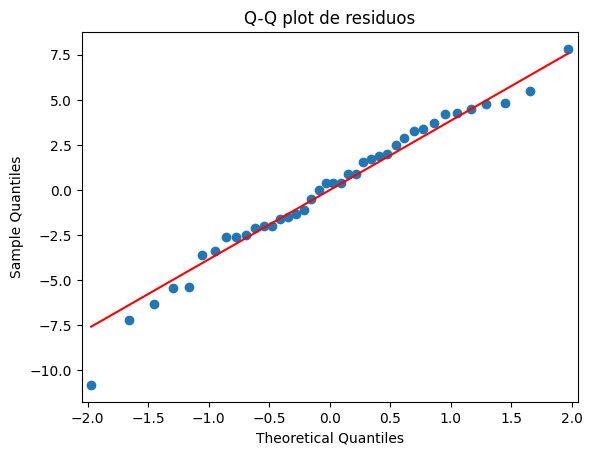

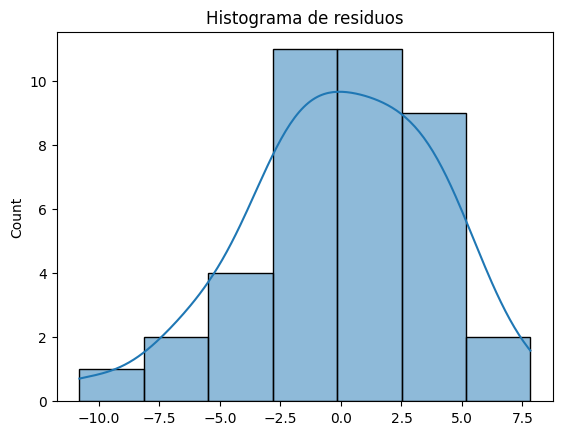

In [501]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns
residuos = modelo_lineal.resid
# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")
# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()
# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

#Ho. hay normalidad
#Hi. no hay normalidad
#Alpha. 0.05

No se rechaza ho, hay normalidad

## Temperatura

In [502]:
from scipy.stats import levene
grupo1 = df[df['temperatura'] == 50]['velocidad']
grupo2 = df[df['temperatura'] == 60]['velocidad']
grupo3 = df[df['temperatura'] == 70]['velocidad']
grupo4 = df[df['temperatura'] == 80]['velocidad']
stat, p = levene(grupo1, grupo2, grupo3, grupo4)
print(f"p-valor de Levene: {p}")

#Ho. homoscedasticidad
#Hi. heteroscedasticidad
#Alpha. 0.05

p-valor de Levene: 0.8117502716163678


No se rechaza ho, hay homoscedasticidad

Multiple Comparison of Means - Tukey HSD, FWER=0.50 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    50     60      8.1 0.2199  2.2788 13.9212   True
    50     70      7.6   0.27  1.7788 13.4212   True
    50     80      6.8 0.3645  0.9788 12.6212   True
    60     70     -0.5 0.9993 -6.3212  5.3212  False
    60     80     -1.3 0.9889 -7.1212  4.5212  False
    70     80     -0.8 0.9974 -6.6212  5.0212  False
----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

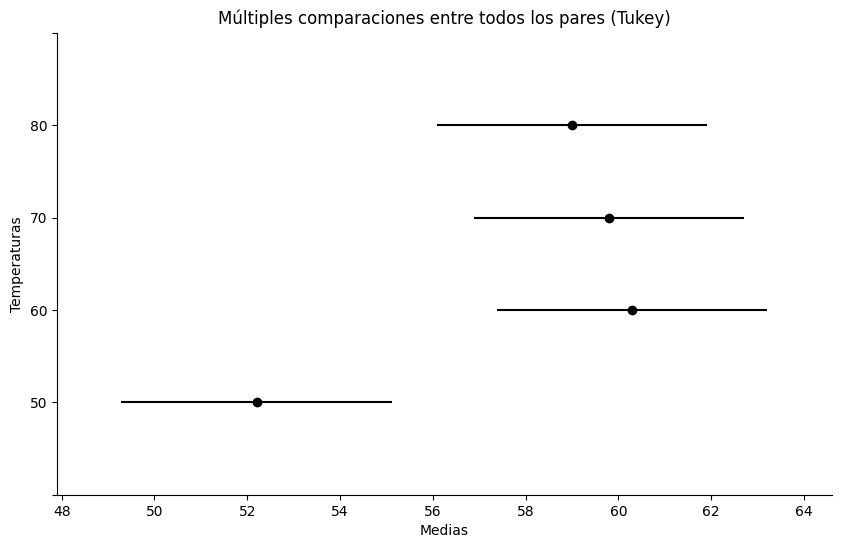

In [503]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
nivel_de_significancia = 0.50
# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['velocidad'], groups=df['temperatura'],
                          alpha=nivel_de_significancia)
# Mostrar los resultados
print(tukey)
# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Temperaturas", xlabel="Medias")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

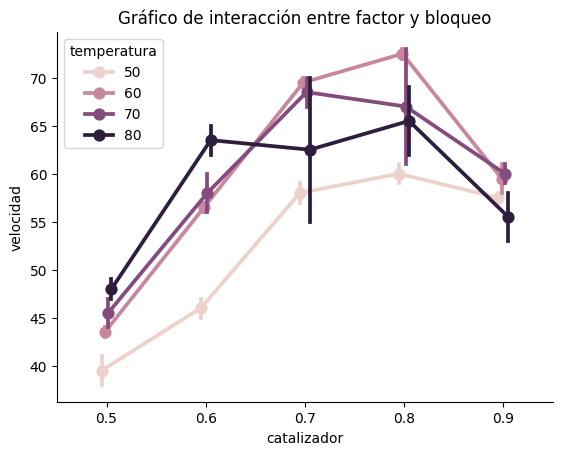

In [504]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de interacción
sns.pointplot(x="catalizador", y="velocidad", hue="temperatura", data=df, dodge=True)
plt.title(f"Gráfico de interacción entre factor y bloqueo")
plt.xlabel("catalizador")
plt.ylabel("velocidad")
plt.legend(title="temperatura")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()

In [505]:
df.groupby(["temperatura"])["velocidad"].mean()

,velocidad
temperatura,
50,52.2
60,60.3
70,59.8
80,59.0


In [506]:
modelo_lineal.params

,0
Intercept,38.500
C(temperatura)[T.60],8.100
C(temperatura)[T.70],7.600
C(temperatura)[T.80],6.800
C(catalizador)[T.0.6],11.875
C(catalizador)[T.0.7],20.500
C(catalizador)[T.0.8],22.125
C(catalizador)[T.0.9],14.000


## Catalizador

In [507]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['catalizador'] == 0.5]['velocidad']
grupo2 = df[df['catalizador'] == 0.6]['velocidad']
grupo3 = df[df['catalizador'] == 0.7]['velocidad']
grupo4 = df[df['catalizador'] == 0.8]['velocidad']
grupo5 = df[df['catalizador'] == 0.9]['velocidad']
stat, p = levene(grupo1, grupo2, grupo3, grupo4, grupo5)
print(f"p-valor de Levene: {p}")

#Ho. homoscedasticidad
#Hi. heteroscedasticidad
#Alpha. 0.05

p-valor de Levene: 0.09419047628240937


No se rechaza ho, hay homoscedasticidad

 Multiple Comparison of Means - Tukey HSD, FWER=0.50 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   0.5    0.6   11.875 0.0009   7.5216 16.2284   True
   0.5    0.7     20.5    0.0  16.1466 24.8534   True
   0.5    0.8   22.125    0.0  17.7716 26.4784   True
   0.5    0.9     14.0 0.0001   9.6466 18.3534   True
   0.6    0.7    8.625 0.0232   4.2716 12.9784   True
   0.6    0.8    10.25 0.0048   5.8966 14.6034   True
   0.6    0.9    2.125 0.9327  -2.2284  6.4784  False
   0.7    0.8    1.625 0.9739  -2.7284  5.9784  False
   0.7    0.9     -6.5 0.1374 -10.8534 -2.1466   True
   0.8    0.9   -8.125 0.0365 -12.4784 -3.7716   True
-----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

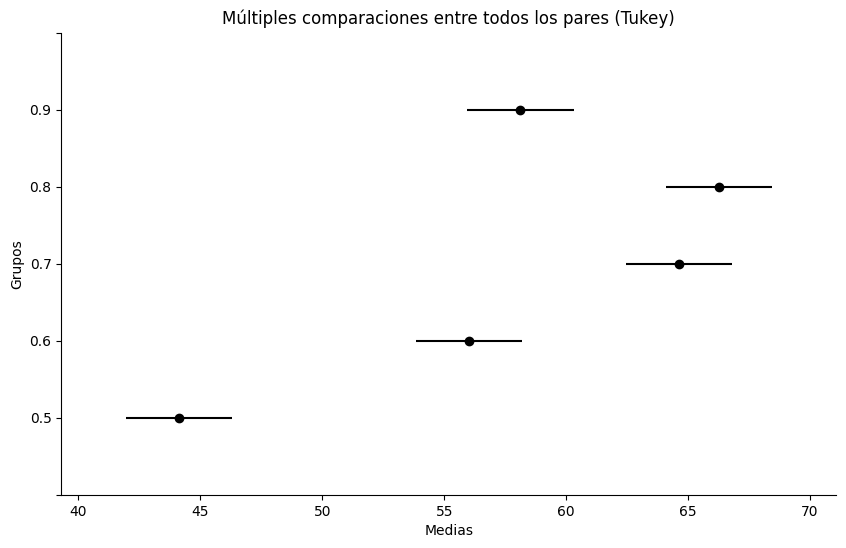

In [508]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
nivel_de_significancia = 0.50
# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['velocidad'], groups=df['catalizador'], alpha=nivel_de_significancia)
# Mostrar los resultados
print(tukey)
# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

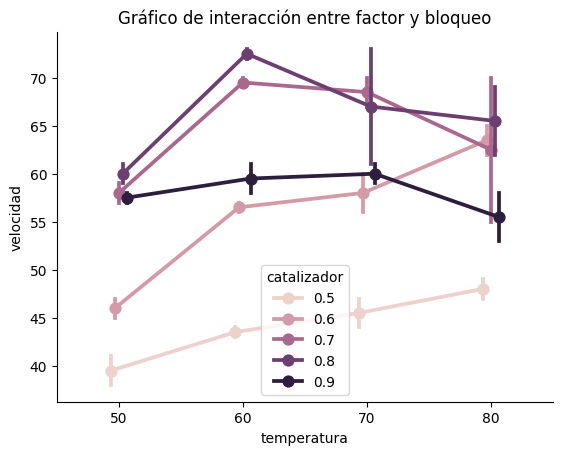

In [509]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de interacción
sns.pointplot(x="temperatura", y="velocidad", hue="catalizador", data=df, dodge=True)
plt.title(f"Gráfico de interacción entre factor y bloqueo")
plt.xlabel("temperatura")
plt.ylabel("velocidad")
plt.legend(title="catalizador")
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.show()

In [510]:
df.groupby(["catalizador"])["velocidad"].mean()

,velocidad
catalizador,
0.5,44.125
0.6,56.000
0.7,64.625
0.8,66.250
0.9,58.125


In [511]:
modelo_lineal.params

,0
Intercept,38.500
C(temperatura)[T.60],8.100
C(temperatura)[T.70],7.600
C(temperatura)[T.80],6.800
C(catalizador)[T.0.6],11.875
C(catalizador)[T.0.7],20.500
C(catalizador)[T.0.8],22.125
C(catalizador)[T.0.9],14.000


En este ejercicio se observo que la temperatura y la cantidad de catalizador si tienen efectos sobre la velocidad de extracción de cierto polímero, pero por separado. Es decir que la temperatura y el catalizador son variables que no tienen interacción entre sí, por ello es recomendable solo cambiar uno u otro para observar efectos en la velocidad de extracción en el polímero deseado.

# RESPUESTAS

**Realice un análisis de varianza. Pruebe si hay efectos principales y de interacción significativos.**
Existe diferencia en la velocidad de extracción de un polímero debido a la temperatura, de igual manera la cantidad de catalizador influye en la velocidad.
Pero la interacción entre temperaturas y catalizador no influyen en la velocidad de extracción de cierto polímero.

# 14.8

En Myers, Montgomery y Anderson-Cook
(2009) se estudia un escenario donde se describe un
proceso de laminado por prensado. La respuesta es el
espesor del material. Los factores que podrían afectar
el espesor incluyen la cantidad de níquel (A) y el pH
(B). Se diseñó un experimento con 2 factores. El plan
es un diseño completamente aleatorizado en el que las
prensas individuales se asignan al azar a las combinaciones de factores. En el experimento se utilizan 3
niveles de pH y 2 niveles de contenido de níquel. Los
espesores, en cm × 10-3, son los siguientes:

| Contenido de níquel (gramos) |      | pH |    |
|------------------------------|------|----|----|
|                              |**6** |**5.5**|**6**|  |
|         18                   | 250  | 211| 221|    |
|                              | 195  | 172| 150|    |
|                              | 188  | 165|170 |    |
|         10                   | 115  | 88 | 69 |    |
|                              | 165  | 112|101  |    |
|                              | 142  | 108 |72  |    |

   a) Elabore la tabla del análisis de varianza con pruebas para los efectos principales y de interacción.Incluya valores P.
  
  b) Saque conclusiones para ingeniería. ¿Qué aprendió del análisis de estos datos?

   c) Elabore una gráfi ca que ilustre la presencia o ausencia de interacción.


In [512]:
import pandas as pd
from io import StringIO

data = '''
niquel,ph,espesor
18,6,250
18,6,195
18,6,188
10,6,115
10,6,165
10,6,142
18,5.5,211
18,5.5,172
18,5.5,165
10,5.5,88
10,5.5,112
10,5.5,108
18,6,221
18,6,150
18,6,170
10,6,69
10,6,101
10,6,72
'''

df = pd.read_csv(StringIO(data))
df

,niquel,ph,espesor
0,18,6.0,250
1,18,6.0,195
2,18,6.0,188
3,10,6.0,115
4,10,6.0,165
5,10,6.0,142
6,18,5.5,211
7,18,5.5,172
8,18,5.5,165
9,10,5.5,88


In [513]:
#Utilizaré Diseño factorial 2k para comprobar si hay interacción entre variables

In [514]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'espesor ~ C(niquel) * C(ph)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova

#Ho: No hay relación entre variables no hay diferencia significativa.
#Hi: Hay relación entre variables, hay diferencia significativa.
#Alpha: 0.05

,sum_sq,df,F,PR(>F)
C(niquel),31250.0,1.0,28.718656,0.000101
C(ph),441.0,1.0,0.405278,0.534647
C(niquel):C(ph),25.0,1.0,0.022975,0.881685
Residual,15234.0,14.0,NaN,NaN


Se rechaza ho solo para niquel, por lo que el contenido en gramos de níquel influye en el espesor del material. Por otro lado, no se rechaza para pH, por lo que este no tiene relación con el espesor del material.

In [515]:
#Utilizaré Diseño completamente aleatorio ya que el factor que podria ser de
#bloque pH no influye en el espesor de un material, por lo tanto solo se estudiara
#con las cantidades de níquel

In [516]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal = ols('espesor ~ C(niquel)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova
#Ho: No hay relación entre variables no hay diferencia significativa.
#Hi: Hay relación entre variables, hay diferencia significativa.
#Alpha: 0.05

,df,sum_sq,mean_sq,F,PR(>F)
C(niquel),1.0,31250.0,31250.00,31.847134,0.000037
Residual,16.0,15700.0,981.25,NaN,NaN


valor-p (Shapiro) = 0.3078866734156134


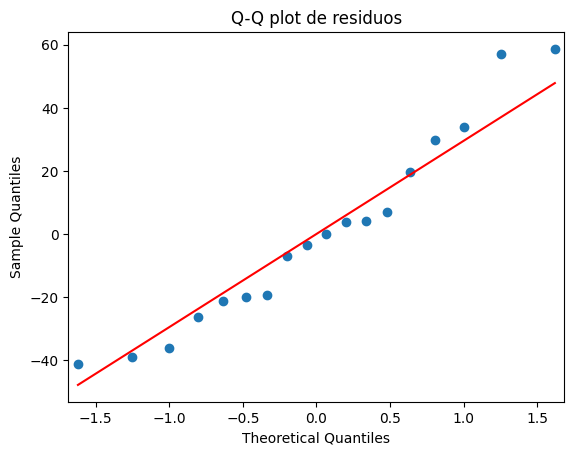

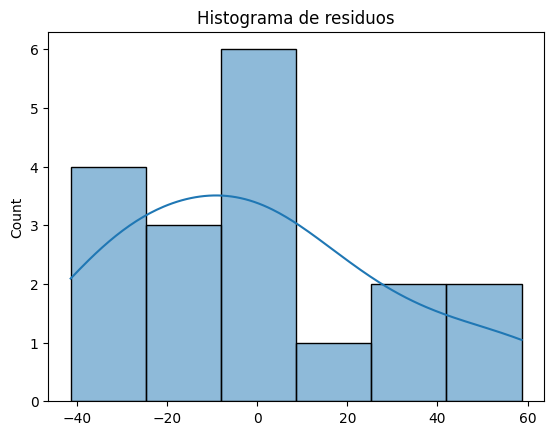

In [517]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns
residuos = modelo_lineal.resid
# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")
# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()
# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()
#Ho: Normalidad
#Hi: No normalidad
#Alpha: 0.05

No se rechaza ho, hay normalidad

In [518]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['niquel'] == 18]['espesor']
grupo2 = df[df['niquel'] == 10]['espesor']
stat, p = levene(grupo1, grupo2)
print(f"p-valor de Levene: {p}")
#Ho: homoscedasticidad
#Hi: heteroscedasticidad
#alpha= 0.05

p-valor de Levene: 0.8454577483655931


No se rechaza ho, hay homoscedasticidad

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower   upper   reject
----------------------------------------------------
    10     18  83.3333   0.0 52.0293 114.6373   True
----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

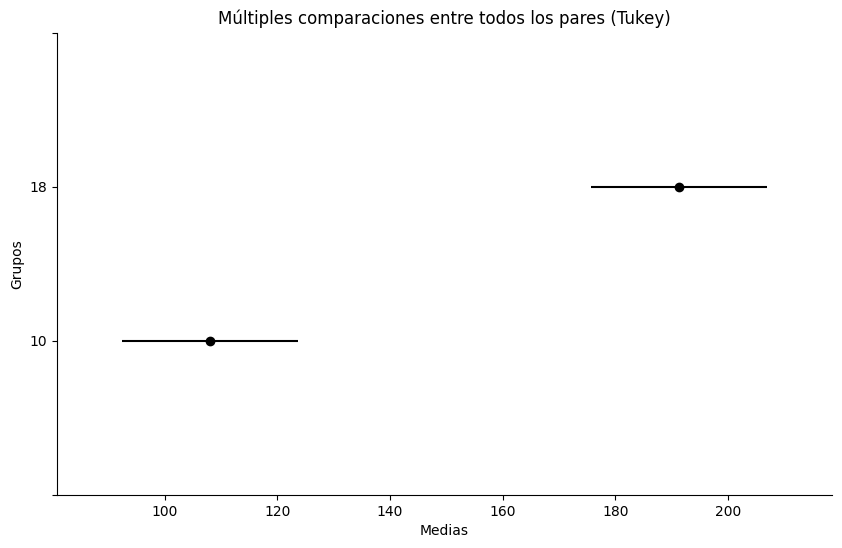

In [519]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['espesor'], groups=df['niquel'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

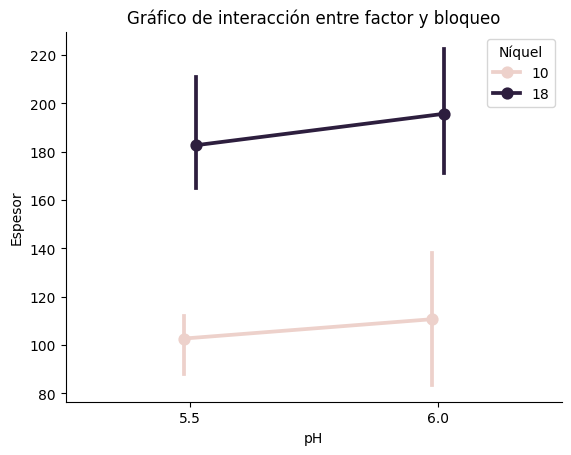

In [520]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de interacción
sns.pointplot(x="ph", y="espesor", hue="niquel", data=df, dodge=True)
plt.title(f"Gráfico de interacción entre factor y bloqueo")
plt.xlabel("pH")
plt.ylabel("Espesor")
plt.legend(title="Níquel")
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.show()

In [521]:
df.groupby(["niquel"])["espesor"].mean()

,espesor
niquel,
10,108.000000
18,191.333333


In [522]:
modelo_lineal.params

,0
Intercept,108.000000
C(niquel)[T.18],83.333333


En este ejercicio observamos que de los dos factores que podrian estar afectando el espesor de un material en un proceso de laminado puede ser la cantidad de níquel y el pH, analizando y aplicando pruebas solo se observa que la cantidad de níquel es la única que influye en el espesor del material. Si se desea mayor espesor es recomendable utilizar 18 gramos de níquel.

# RESPUESTAS

**a) Elabore la tabla del análisis de varianza con pruebas para los efectos principales y de interacción.Incluya valores P.**
Existe diferencia significativa en el espesor de un material debido al contenido de niquel, mientras que con el pH no hay diferencia significativa. Ademas, la interacción de niquel y pH no influyen en el espesor del material.

**b) Saque conclusiones para ingeniería. ¿Qué aprendió del análisis de estos datos?**
Aprendí a reconocer cuando un factor si influye en mi variable de respuesta y analizar diferencias significativas entre estos datos.

**c) Elabore una gráfica que ilustre la presencia o ausencia de interacción.** Hay ausencia de interacción.

# 14.9

Un ingeniero está interesado en los efectos de la
velocidad de corte y la geometría de la herramienta sobre las horas de vida de una máquina-herramienta. Se
utilizan 2 velocidades de corte y 2 geometrías distintas.
Se llevan a cabo 3 pruebas experimentales con cada una
de las 4 combinaciones. Los datos son los siguientes:

| Geometría de la herramienta | Velocidad de corte |     |      |     |
|-----------------------------|--------------------|-----|------|-----|
|                             | Baja| Alta |     |
| 1                           | 22, 28, 20         | 34  | 37   | 29  |
| 2                           | 18, 15, 16         | 11  | 10   | 10  |

  a) Calcule la tabla del análisis de varianza con pruebas sobre los efectos principales y de interacción.
  
  b) Haga comentarios sobre el efecto que tiene la interacción sobre la prueba de la velocidad de corte.

   c) Efectúe pruebas secundarias que permitan al ingeniero conocer el verdadero impacto de la velocidad de corte.
  
  d) Construya una gráfica que ilustre el efecto de interacción.

In [523]:
import pandas as pd
from io import StringIO

data = '''
geometria,velocidad,efecto
1,Baja,22
1,Baja,28
1,Baja,20
1,Alta,34
1,Alta,37
1,Alta,29
2,Baja,18
2,Baja,15
2,Baja,16
2,Alta,11
2,Alta,10
2,Alta,10
'''

df = pd.read_csv(StringIO(data))
df

,geometria,velocidad,efecto
0,1,Baja,22
1,1,Baja,28
2,1,Baja,20
3,1,Alta,34
4,1,Alta,37
5,1,Alta,29
6,2,Baja,18
7,2,Baja,15
8,2,Baja,16
9,2,Alta,11


In [524]:
#Utilizaré Diseño factorial 2k para comprobar si hay interacción entre variables

In [525]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'efecto ~ C(geometria) * C(velocidad)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova

#Ho: No hay relación entre variables no hay diferencia significativa.
#Hi: Hay relación entre variables, hay diferencia significativa.
#Alpha: 0.05

,sum_sq,df,F,PR(>F)
C(geometria),675.000000,1.0,74.311927,0.000025
C(velocidad),12.000000,1.0,1.321101,0.283595
C(geometria):C(velocidad),192.000000,1.0,21.137615,0.001761
Residual,72.666667,8.0,NaN,NaN


Se rechaza ho para geometria y para la interacción, por lo que se refiere a que la geometria por si sola tiene efectos sobre la vida de una maquina-herramienta. La velocidad no tiene efecto en lo que se busca pero la interacción de ambos factores si la tienen.

valor-p (Shapiro) = 0.8362138041408954


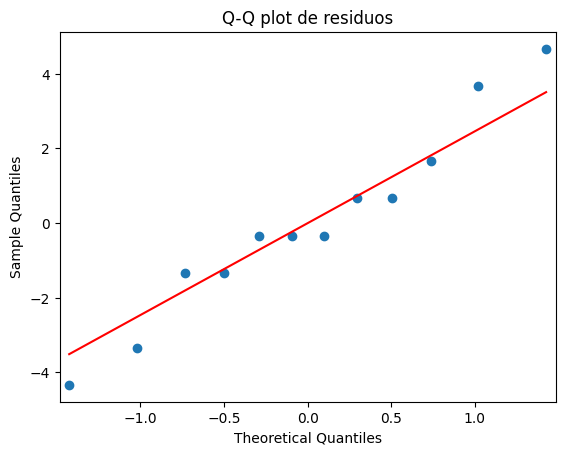

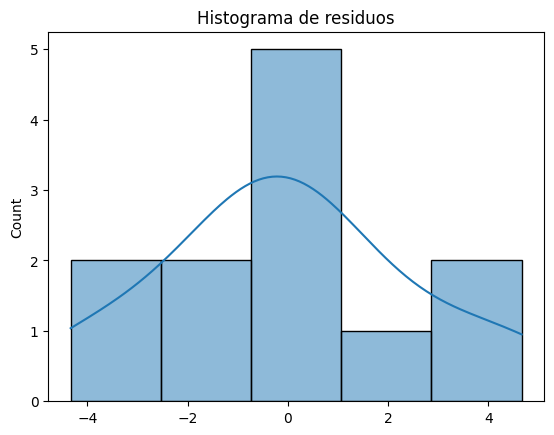

In [526]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns
residuos = modelo_lineal.resid
# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")
# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()
# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

#Ho: Normalidad
#Hi: No normalidad
#Alpha: 0.05

No se rechaza ho, hay normalidad

In [527]:
from scipy.stats import levene

# Obtener residuos del modelo
residuos = modelo_lineal.resid

# Agregar residuos al dataframe original
df['residuos'] = residuos

# Agrupar residuos por combinación de factores
# Supongamos que tus factores son A, B, y C
grupos = df.groupby(['geometria', 'velocidad'])['residuos'].apply(list)

# Ejecutar prueba de Levene
stat, p = levene(*grupos)

print(f'Estadístico de Levene: {stat:.3f}')
print(f'Valor p: {p:.3f}')
#Ho: Homoscedasticidad
#Hi: Heteroscedasticidad
#Alpha: 0.05

Estadístico de Levene: 0.993
Valor p: 0.444


No se rechaza ho, hay homoscedasticidad

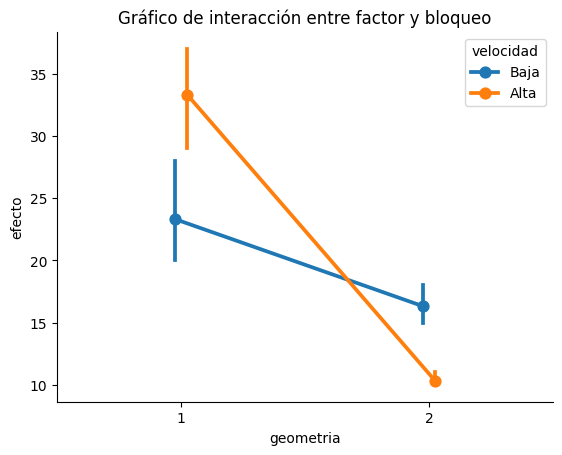

In [528]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de interacción
sns.pointplot(x="geometria", y="efecto", hue="velocidad", data=df, dodge=True)
plt.title(f"Gráfico de interacción entre factor y bloqueo")
plt.xlabel("geometria")
plt.ylabel("efecto")
plt.legend(title="velocidad")
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.show()

En este ejercicio se busca saber si la velocidad de corte y la geometría de una herramienta tienen efectos sobre las horas de vida de una máquina-herramienta, por lo que al hacer las pruebas se observo que la geometría de la herramienta por si sola si tiene estos efectos, aunque convinada con la velocidad, influyen en conjunto aun más en las horas de vida de cierta máquina-herramienta. (La velocidad por si sola no presenta efectos).

# RESPUESTAS

**a) Calcule la tabla del análisis de varianza con pruebas sobre los efectos principales y de interacción.**
Existe diferencia significativa en las horas de vida de una maquina-herramienta debido a la geometria de la herramienta, por otra parte la velocidad de corte no influye en las horas de vida de dicha maquina.

**b) Haga comentarios sobre el efecto que tiene la interacción sobre la prueba de la velocidad de corte.**
La interacción entre la geometria y la velocidad de corte si influyen en las horas de vida de una máquina-herramienta. La velocidad por si sola no influye en la vida de esta.

**c) Efectúe pruebas secundarias que permitan al ingeniero conocer el verdadero impacto de la velocidad de corte.**
La velocidad de corte solo tiene impacto en la vida de una máquina si es que interactua con la geometria de una herramienta. Entre estos dos factores juntos influyen más en las horas que una maquina tiene de vida.

**d) Construya una gráfica que ilustre el efecto de interacción.**
Si hay interacción